# Multilayer Perceptron (Feed-Forward Network / Artificial Neural Network)
In this notebook we will cover the use of Keras for creating a very small neural network (MLP) to solve a binary classification problem. This is the simplest form of *supervised machine learning*.

## Pre-requisites
Uncomment the appropriate lines to install the packages. We will most likely be re-running this notebook several times, so you may wish to comment them again after installation (or use pip from command prompt).

Packages needed for this workshop:
- Keras
- Tensorflow
- Numpy
- Scikit-learn
- Pandas

Keras is built on top of Tensorflow. Scikit-learn is a library which focuses on machine learning algorithms and techniques, we will be using some utility functions from this. Pandas is a Data Science framework for wrangling data and dealing with large volumes in a nicer way; manually processing records and columns is a chore, this makes things simpler.



In [109]:
#%pip install keras
#%pip install tensorflow
#%pip install numpy
#%pip install scikit-learn
#%pip install pandas

## Imports
Our main imports will be `tensorflow`, and `keras`. Just like with `numpy`, we often make use of aliases when importing `tensorflow` to make life easier.

One of the more useful imports we want to have is `from tensorflow.keras import layers`, this allows us to quickly define layers of our neural network.
E.g `layers.Dense(N)` for a single layer containing N of fully-connected perceptrons to/from surrounding layers.

*Note*: the layers import is strictly for convenience. We can access everything from the top-level module, tensorflow. `layers.Dense()` is equivalent to `tensorflow.keras.layers.Dense()`, but writing that everytime can make code confusing and hurt readability. Code readability is key to good software for you and your team.

When importing tensorflow, you may see some output related to cuda if you have a supported GPU. Tensorflow will automatically run on the GPU if supported, otherwise it will be on the CPU only. GPU acceleration is a huge part in why modern machine learning is so popular, performant, and efficient.

Here, we will use the `__version__` meta-attribute to check the version of both the base tensorflow library, and the keras library.

In [110]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [111]:
# We will use these later, best to import them up here.
import numpy as np
import sklearn
import pandas as pd

In [112]:
print(tf.__version__)
print(keras.__version__)

2.20.0
3.11.3


## Importing some Data - Wine Quality Classification

Before we can define our model, we first need to determine what our input is. What is the task we are trying to solve? What features are we looking at?

For this activity we're going to be looking at a simple dataset to get started. We're going to be looking at a cleaned and already preprocessed dataset from the UCI Machine Learning Repository. These data include 11 input features of various qualities of wine. Our task is to classify the wine as "good" or "bad". These classifications were derived from wine tasting scores. (Bhat, 2020)

Make sure you download the `wine.csv` file from Canvas. Put this in the same folder as your `.ipynb` notebook.

Bhat, N. (2020) “Wine Quality Classification.” Available at: https://www.kaggle.com/nareshbhat/wine-quality-binary-classification.

The file format is in that of a `.csv` file. A **comma seperated value** file. Each row represents a separate patient records, and our columns (features) are separated by `,`.

For our Data Description we have the following information from Bhat (2020).

Input variables (based on physicochemical tests):

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):

12. quality ('good' and 'bad' based on score >5 and <5)


In [113]:
import os
print(os.getcwd())

c:\Users\kojus\OneDrive\Desktop\School-Masters\Github_Coding_Courses\Machine_Learning & Data_Mining-CETM20


In [114]:
# Make sure to import pandas as pd somewhere in your file (we did this at the top)

# We can tell Pandas to read our CSV data file by giving it a file path.
training_data = pd.read_csv(r'wine-3.csv')


In [115]:
training_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


### Initial Pre-processing

At the moment, our target variable (our last column), is mixed in with the rest of our data, and it's in the wrong format. We need to change bad -> 0, good -> 1.

Then we want to separate it into our input data (the features), and our target variable ( the thing we want to predict ).

In [116]:
# Grab the quality column, and then remove it from the main Dataframe.
training_y = training_data.pop('quality')

# Data needs to be numeric for us to work with it.
# We can use dataframe.replace to replace values with others.
# In this case, we'll replace "good" with 1, as we're making a good quality wine classifier.
#
# inplace=True means we don't need to assign it to a new variable.
training_y.replace("good", 1, inplace=True)
training_y.replace("bad", 0, inplace=True)

# This means training_data is left with the rest of the data.
# TODO: You can use training_data[["colA","colB","colC"]] etc to specify the names of columsn.
# E.g training_data[["citric acid", "chloriddes"]] would grab only those columns for citric acid, and chlorides from the dataframe.
# Note: training_data["single column"] for grabbing just one column.
#       training_data[["firstColumn", "secondColumn"]] if we want multiple columns.
# [] vs [[]]

training_x = training_data

C:\Users\kojus\AppData\Local\Temp\ipykernel_21376\19925079.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_y.replace("bad", 0, inplace=True)


In [117]:
training_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [118]:
training_y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

#### Converting Pandas DataFrame into a Numpy Array

If we try and pass our Pandas DataFrame (and all its magical properties) to our Keras neural network, it will most likely error. Once we're done with pre-processing and using Pandas utilities, we can convert the dataframe ready for input into the Neural Network. *These networks really are quite picky!*

I will define some new variables `arr_train_x` and `arr_train_y`, but you can override variable names if you wish.

In [119]:
arr_train_x = training_x.to_numpy()
arr_train_y = training_y.to_numpy()

In [120]:
print(arr_train_x)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [121]:
print(arr_train_y)

[0 0 0 ... 1 0 1]


## Defining our Model

Usually Keras model definition is wrapped in a user-defined function. However, for the purposes of this small network, this is unnecessary.

Today we will be using the *Sequential API* for model definition. This is for straight-forward networks which are built layer-by-layer. For more complex networks, the *Functional API* is required (multi-input, multi-output, etc).

We define a new Sequential model, this will be empty. From this we can sequentially add layers, starting from the input and working towards our output.

The `layers.InputLayer` has a number of parameters we can provide it. Most importantly this will be the expected input shape. As we have already looked at the data we wish to pass this network, we know that we have 11 features (fixed acidity, volatile acidity, ..., sulphates), and the target variable (Wine Quality). Therefore, the input shape to our network is `(11)`.
*Note*: We need to ensure the shape is a `tuple`. E.g `(1, 2, 3)` using parenthese. This is because our input shape can get quite complex and multi-dimensional. E.g `(224,224,3)` is an example from Computer Vision for a single colour image.

Once we've defined all of our layers, we can run `model.summary()` and this will print out a list of our layers, their output shape, and how many tunable parameters (the thing which needs to be learned!) there are. The great thing about Keras is that all the calculations for shapes of all your vectors/matrices is done for you. You specify how many nodes per layer, and Keras does the rest. *This is certainly quicker than how we used to have to calculate this by hand!*

*Note*: You may see lots of output after our table from Keras/Tensorflow. This is most likely GPU finding. These models we're defining are graphs. These graphs go onto the CPU/GPU ready to be fed with data.

For this network we have our 11 input features, then a layer of **32** perceptrons (fully-connected to each input), the output of each of these hidden layer perceptrons is then fully-connected to the next layer, a layer of **1** perceptron (our output). For our hidden layer, the activation function is selected to be `relu`. Our final layer is the `sigmoid` output.

In [122]:
print(arr_train_x.shape)
print(arr_train_y.shape)

(1599, 11)
(1599,)


In [123]:
model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(11,))) # 11 Columns of input

model.add(layers.Dense(32, activation="relu"))

model.add(layers.Dense(1, activation="sigmoid")) # 0->1 floating

model.summary()


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling our Model

We have just defined our model, and the layers it has. However, this isn't everything. For a model to be trainable we need to define a loss function. I.e How do we calculate the difference between the network's output and the ground truth output (what it should be).

In our reading, we introduced this as the concept related to the distance squared between two real numbers. However, we're working with categories in our outputs here. We either have good wine, or bad wine. This is known as **binary classification**

For our optimiser, we will use **Stochastic Gradient Descent**; later on we will explore other optimiser, but let's keep the classic `sgd`.
We can tell Keras to automatically log some metrics. `accuracy` is one which it understands by default (A list can be found https://keras.io/api/metrics/accuracy_metrics/#binaryaccuracy-class)

### Loss Function
For this we are using `binary_crossentropy`. It's as simple as stating it as a string.

$$
H_{p}(q) = -\frac{1}{N}\sum_{i=1}^{N}y_{i}\cdot log(p(y_{i})) + (1-y_{i})\cdot log(1-p(y_{i}))
$$

Where:

$$
y_{i}\cdot log(p(y_{i}))
$$
If $y_{i}$ is 0, then this whole terms goes to 0. Conversely:

$$
(1-y_{i})\cdot log(1-p(y_{i})
$$
If $y_{i}$ is 1 (the other class), then this term goes to zero because of the $(1-y_{i})$.

Therefore, when we look at this equation, we either have the left side of the $+$, of the right side. In either case we are simply taking the `log()` of the class output. Hence why binary crossentropy is often refered to as the log-loss.

In [124]:
# Compile the model.
model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

## Fitting our model

We have our model architecture defined. We have compiled it, providing the loss definition, the optimiser, and any metrics we wish to log. Now comes the time to train our model.

We provide the model with both the input data and the ground truth data for the target variable. From this, using the loss function, it will adjust its parameters (weights) to minimise the loss function.

An important parameter to provide when training is the number of epochs. An `epoch` is defined as a single iteration through the whole input dataset. E.g If we have 500 records, then 1 epoch is when all 500 records have been through the network (and backprop for learning). After a single epoch our network may not have learned the problem perfectly, so we can repeat over many epochs, gradually improving our network. At a certain stage, we will hit some limitation where more examples do not improve the network. We will have stagnated, and training should stop.

For now, we are going to set this to an initial value of 50. We can modify this later to see what happens.
Provide your `training_x` and `training_y` data to the fit function. X first, labels second.

In [125]:
model_training_history = model.fit(
    arr_train_x,
    arr_train_y,
    epochs = 50
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5541 - loss: 1.2693
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5885 - loss: 0.7220
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6160 - loss: 0.6636
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6060 - loss: 0.6666
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6223 - loss: 0.6598
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6254 - loss: 0.6511
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6323 - loss: 0.6450
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6260 - loss: 0.6394
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6310 - loss: 0.6413
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6366 - loss: 0.6375
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 0.6400
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6329 - lo

## Evaluating our Model
### Plotting Loss and Accuracy curves using History

When fitting our Keras model, we can get a `History` object back out. This contains the metrics for loss for each epoch, as well as any additional metrics we defined (such as accuracy).

If we `print(model_training_history.history.keys())` we can see what's available to us. This is because our rich History object (we called it model_training_history), has a dictionary inside (called history). If we get all the keys to that dictionary we can see the metrics it's stored.

In [126]:
print(model_training_history.history.keys())

dict_keys(['accuracy', 'loss'])


We can use a library called Matplotlib to help us graph these metrics per epoch. This will provide us an idea of how our model was during training, and can help us determine what to do.

Text(0.5, 0, 'epochs')

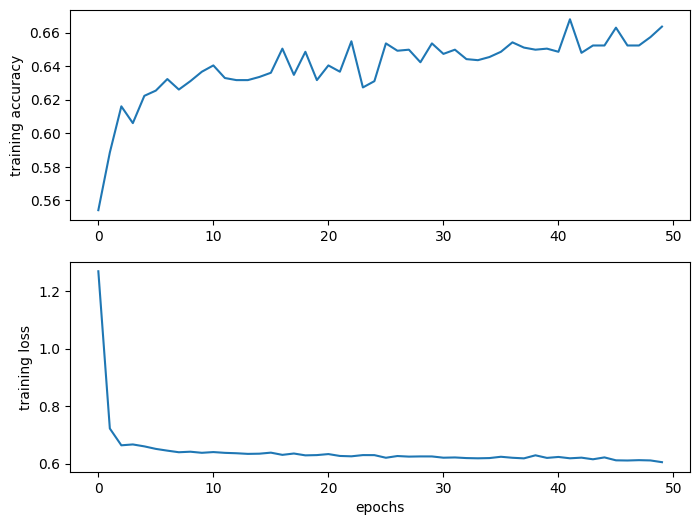

In [127]:
import matplotlib.pyplot as plt

# If we want to be fancy, we can set a theme by uncommenting the below line.
#plt.style.use('ggplot')

# Set up a figure, and two handles for our 2 figures.
# Subplot can make many many plots within a single figure.
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

# Get our accuracy and loss metrics (these should be lists of numbers)
acc = model_training_history.history['accuracy']
loss = model_training_history.history['loss']

# We want accuracy on our first graph
ax1.plot(acc)
# Loss on our second
ax2.plot(loss)
    
# Give our figures some x and y axis labels.
ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')

# They both share an x axis, so we only need to define it on the bottom-most.
ax2.set_xlabel('epochs')

### Task - Good Practice: We need hold-out data. Where's the test set?

We made a mistake when training our Neural Network. We used all of our data for training. Now we have a fully-trained model, but it's seen all of the data we have. We can't evaluate it purely on the training data. That would be like asking you to take an exam where we've already shown you the answers!

Therefore, we should have partitioned our initial dataset into a training and a test set. We can use sklearn for this.

`train_test_split` is a utility function which accepts our X data, and labels: y. It can partition (we have chosen test_size of 30%) as well as shuffle our data for us. Here we provide a `random_state` so that it will shuffle the same way everytime (deterministic) for testing purposes. In the real-world we would not leave this in.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [128]:
from sklearn.model_selection import train_test_split

# Train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    arr_train_x, arr_train_y, test_size=0.3, random_state=2, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(1119, 11)
(480, 11)


Now we have a roughly 70-30 split for our data, as well as our labels.

#### Do the following:

Go back to our training procedure from before, and insert this train_test_split functionality before we get to training our model. Re-run your experiment using the <u>training set</u>.

## <span style = "color: #90ee90;"> __Hypertuning__ </span>

#### <span style = "color: #58c258ff;"> _Tuning Only the data to be trained to only the X_train and Y-train (maintaining previous parameters)_</span>

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    arr_train_x, arr_train_y, test_size=0.3, random_state=2, shuffle=True
)

print(X_train.shape)
print(X_test.shape)

(1119, 11)
(480, 11)


In [130]:
#Model Build
model_2 = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_2.summary()


#Model Compiling
model_2.compile(
    optimizer="sgd",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


#Model Fitting
model_training_history_2 = model_2.fit(
    X_train,
    Y_train,
    epochs=50
)



c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5478 - loss: 1.5959
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5782 - loss: 0.7805
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5657 - loss: 0.7287
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5862 - loss: 0.6878
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6104 - loss: 0.6710
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6032 - loss: 0.6601
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6014 - loss: 0.6538
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6193 - loss: 0.6499
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6309 - loss: 0.6469
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6202 - loss: 0.6442
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6318 - loss: 0.6451
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6184 - lo

In [131]:
print(model_training_history_2.history.keys())

dict_keys(['accuracy', 'loss'])


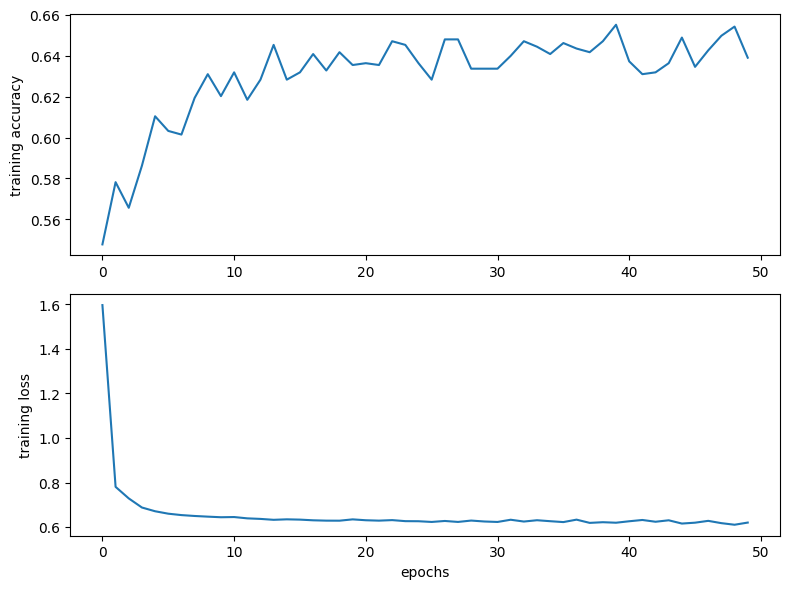

In [132]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
acc = model_training_history_2.history['accuracy']
loss = model_training_history_2.history['loss']

ax1.plot(acc)
ax2.plot(loss)

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')

plt.tight_layout()
plt.show()

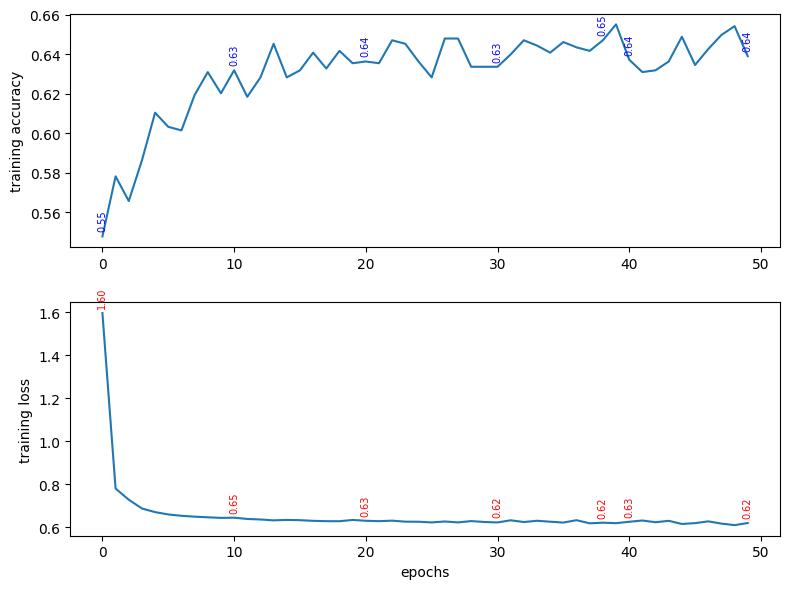

In [133]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
acc = model_training_history_2.history['accuracy']
loss = model_training_history_2.history['loss']

ax1.plot(acc)
ax2.plot(loss)

# Annotate accuracy and loss values only at epochs 0, 10, 20, 30, 40, 49 (Python is 0-indexed, so last epoch is len(acc)-1)
epochs_to_annotate = [0, 10, 20, 30, 38, 40, len(acc)-1]
for i in epochs_to_annotate:
    ax1.annotate(f'{acc[i]:.2f}', (i, acc[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='blue', rotation=90)
    ax2.annotate(f'{loss[i]:.2f}', (i, loss[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='red', rotation=90)

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')

plt.tight_layout()
plt.show()

it appears accuracy hit its peak at epoch 38; an all-high of `0.65` and the loss value is `0.62`.

Although both values aren't as excellent as may be expected. Further optimization will limit the epochs to a max of 40. Any training after epoch 40 is simply `overfitting`

In [134]:
#Model Build
model_3 = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3.summary()


#Model Compiling
model_3.compile(
    optimizer="sgd",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


#Model Fitting
model_training_history_3 = model_3.fit(
    X_train,
    Y_train,
    epochs=40
)



c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5398 - loss: 2.4869
Epoch 2/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5880 - loss: 0.7921
Epoch 3/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6068 - loss: 0.6824
Epoch 4/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5871 - loss: 0.6952
Epoch 5/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6086 - loss: 0.6681
Epoch 6/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6202 - loss: 0.6572
Epoch 7/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6175 - loss: 0.6437
Epoch 8/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6122 - loss: 0.6479
Epoch 9/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6184 - loss: 0.6384
Epoch 10/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6363 - loss: 0.6424
Epoch 11/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6318 - loss: 0.6360
Epoch 12/40
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - lo

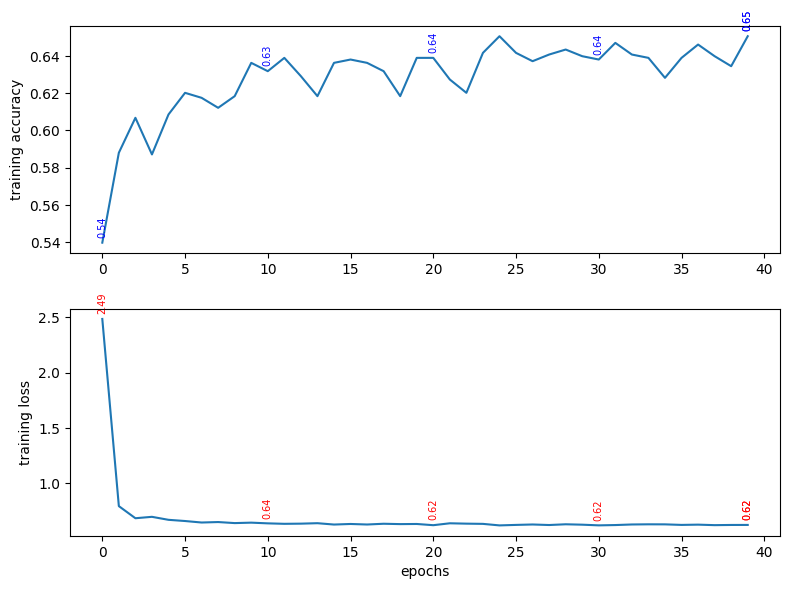

In [135]:
fig, (ax1, ax2) = plt.subplots (2, figsize=(8,6))

acc = model_training_history_3.history['accuracy']
loss = model_training_history_3.history['loss']

ax1.plot(acc)
ax2.plot(loss)

epochs_to_annotate = [0, 10, 20, 30,39,len(acc)-1]

for i in epochs_to_annotate:
    ax1.annotate(f'{acc[i]:.2f}', (i, acc[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='blue', rotation=90)
    ax2.annotate(f'{loss[i]:.2f}', (i, loss[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='red', rotation=90)

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')

plt.tight_layout()
plt.show()

The improvement isnt any better

#### <span style = "color: #58c258ff;"> _Further Tuning_</span>

- Add more layers now. If this isnt better then I'd:
   - use mse instead of binary_crossentropy 
   - try using tahn isntead of relu

In [136]:
#Model Build
model_4 = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#model_4.summary()


#Model Compiling
model_4.compile(
    optimizer="sgd",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


#Model Fitting
model_training_history_4 = model_4.fit(
    X_train,
    Y_train,
    epochs=60
)



Epoch 1/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5576 - loss: 0.7664 
Epoch 2/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6068 - loss: 0.6645
Epoch 3/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5532 - loss: 0.6723
Epoch 4/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6166 - loss: 0.6561
Epoch 5/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6095 - loss: 0.6554
Epoch 6/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6256 - loss: 0.6490
Epoch 7/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6363 - loss: 0.6378
Epoch 8/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6256 - loss: 0.6472
Epoch 9/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6265 - loss: 0.6399
Epoch 10/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6193 - loss: 0.6377
Epoch 11/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6229 - loss: 0.6404
Epoch 12/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6336 - l

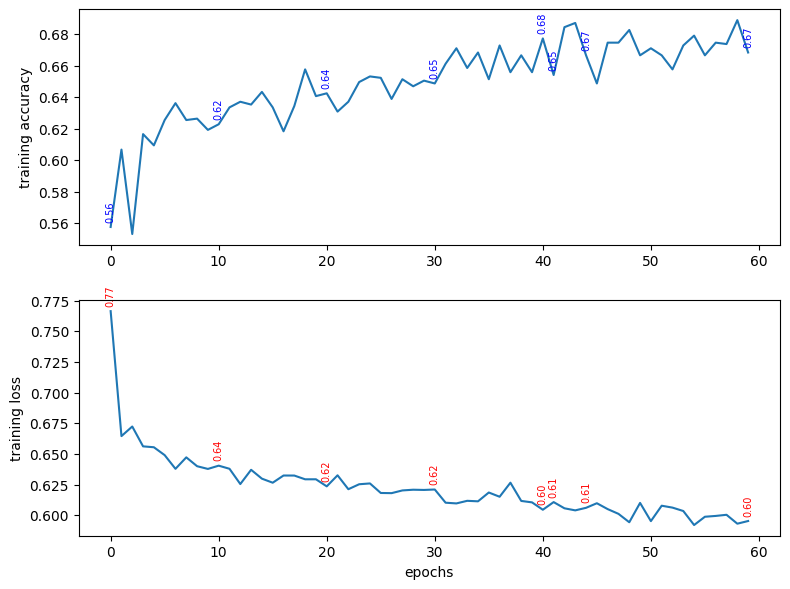

In [137]:
fig, (ax1, ax2) = plt.subplots (2, figsize=(8,6))

acc = model_training_history_4.history['accuracy']
loss = model_training_history_4.history['loss']

ax1.plot(acc)
ax2.plot(loss)

epochs_to_annotate = [0, 10, 20, 30,40,41, 44,len(acc)-1]

for i in epochs_to_annotate:
    ax1.annotate(f'{acc[i]:.2f}', (i, acc[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='blue', rotation=90)
    ax2.annotate(f'{loss[i]:.2f}', (i, loss[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='red', rotation=90)

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')

plt.tight_layout()
plt.show()

#### <span style = "color: #58c258ff;"> _Further Tuning_</span>

- use mse instead of binary_crossentropy 
- try using tahn isntead of relu

In [138]:
#Model Build
model_4 = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(8, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

#model_4.summary()


#Model Compiling
model_4.compile(
    optimizer="sgd",
    loss="MeanSquaredError",
    metrics=["accuracy"]
)


#Model Fitting
model_training_history_4 = model_4.fit(
    X_train,
    Y_train,
    epochs=60
)



Epoch 1/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5594 - loss: 0.2473
Epoch 2/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6077 - loss: 0.2318
Epoch 3/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6193 - loss: 0.2278
Epoch 4/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6390 - loss: 0.2260
Epoch 5/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6345 - loss: 0.2250
Epoch 6/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6434 - loss: 0.2230
Epoch 7/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6282 - loss: 0.2234
Epoch 8/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6372 - loss: 0.2221
Epoch 9/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 0.2218
Epoch 10/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6452 - loss: 0.2209
Epoch 11/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6434 - loss: 0.2216
Epoch 12/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - l

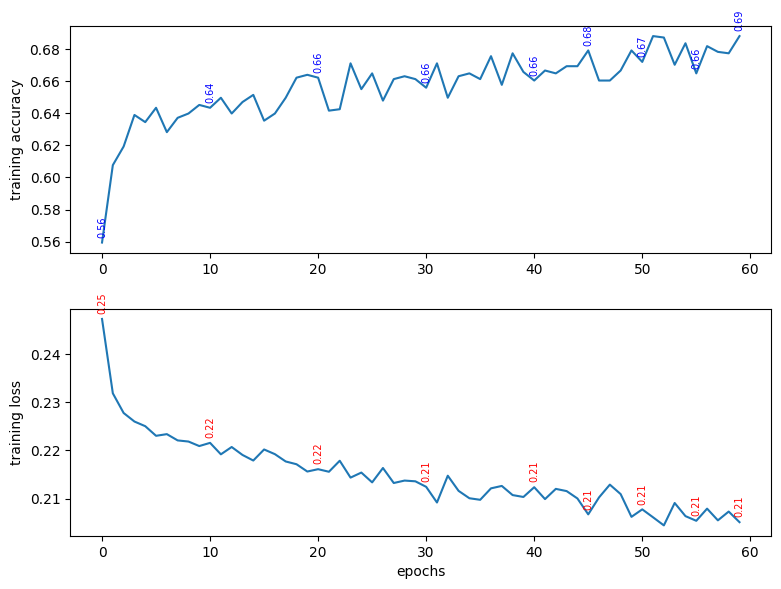

In [139]:
fig, (ax1, ax2) = plt.subplots (2, figsize=(8,6))

acc = model_training_history_4.history['accuracy']
loss = model_training_history_4.history['loss']

ax1.plot(acc)
ax2.plot(loss)

epochs_to_annotate = [0, 10, 20, 30,40,45, 50, 55,len(acc)-1]

for i in epochs_to_annotate:
    ax1.annotate(f'{acc[i]:.2f}', (i, acc[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='blue', rotation=90)
    ax2.annotate(f'{loss[i]:.2f}', (i, loss[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='red', rotation=90)

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')

plt.tight_layout()
plt.show()

The losses seems to be getting better with tanh. I'd change the metric to Recall. Thinking about nit, we'd like to have less FP (a wine is good where it actually isnt). For this, Recall or Precision (if the goal is to ensure the prediction of TPs are reliable)

In [140]:
#Model Build
model_5 = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(8, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])



#Model Compiling
model_5.compile(
    optimizer="sgd",
    loss="MeanSquaredError",
    metrics=["recall"]
)


#Model Fitting
model_training_history_5 = model_5.fit(
    X_train,
    Y_train,
    epochs=60
)



c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2458 - recall: 0.4313   
Epoch 2/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2359 - recall: 0.7060
Epoch 3/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2334 - recall: 0.7060
Epoch 4/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2312 - recall: 0.7500
Epoch 5/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2291 - recall: 0.7658
Epoch 6/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2288 - recall: 0.7430
Epoch 7/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2277 - recall: 0.7606
Epoch 8/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2278 - recall: 0.7570
Epoch 9/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2264 - recall: 0.7623
Epoch 10/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2260 - recall: 0.7623
Epoch 11/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2250 - recall: 0.7482
Epoch 12/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2249 - recall: 0.7746
Epoch 13/6

----

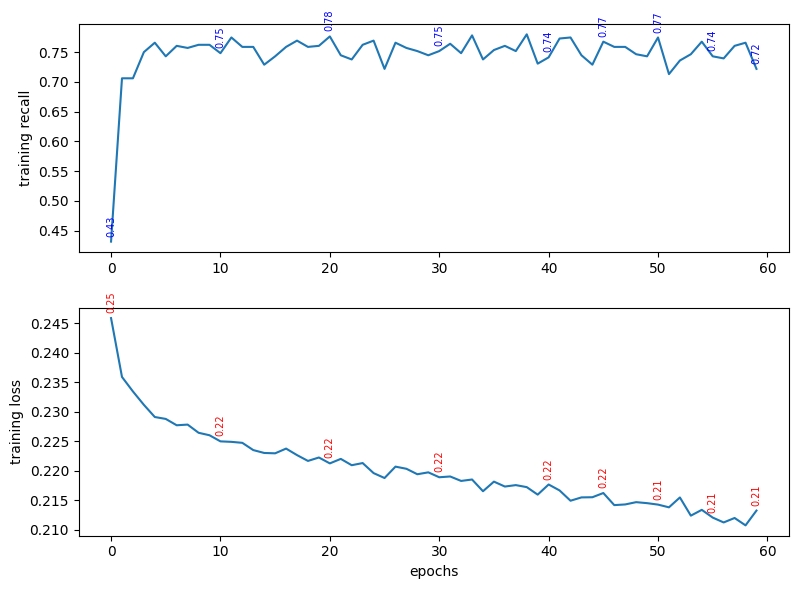

In [141]:
fig, (ax1, ax2) = plt.subplots (2, figsize=(8,6))

recall = model_training_history_5.history['recall']
loss = model_training_history_5.history['loss']

ax1.plot(recall)
ax2.plot(loss)

epochs_to_annotate = [0, 10, 20, 30,40,45, 50, 55,len(acc)-1]

for i in epochs_to_annotate:
    ax1.annotate(f'{recall[i]:.2f}', (i, recall[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='blue', rotation=90)
    ax2.annotate(f'{loss[i]:.2f}', (i, loss[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='red', rotation=90)

ax1.set_ylabel('training recall')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')

plt.tight_layout()
plt.show()

#### <span style = "color: #58c258ff;"> _Further Tuning_</span>

- use binary_crossentropy 
- try using tahn and relu
- add a learning rate to optimzeer SGD
- add a batch_size

In [142]:
#Model Build
model_6 = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="relu"), #not sure which layer relu could have been but since tanh is zero-cenred and broader -1 and 1, its probably bteer to give the nmodel enough room with tanh and streamline with relu- closer to the output
    layers.Dense(1, activation="sigmoid")
])



#Model Compiling
from tensorflow.keras.optimizers import SGD
model_6.compile(
    optimizer=SGD(learning_rate=0.01),
    loss="MeanSquaredError",
    metrics=["accuracy"]
)


#Model Fitting
model_training_history_6 = model_6.fit(
    X_train,
    Y_train,
    epochs=60,
    batch_size=100
)



Epoch 1/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4933 - loss: 0.2556
Epoch 2/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5836 - loss: 0.2399
Epoch 3/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6023 - loss: 0.2354 
Epoch 4/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6077 - loss: 0.2333
Epoch 5/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6104 - loss: 0.2317
Epoch 6/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6139 - loss: 0.2303
Epoch 7/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6130 - loss: 0.2294
Epoch 8/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6193 - loss: 0.2285
Epoch 9/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6220 - loss: 0.2282
Epoch 10/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6193 - loss: 0.2276
Epoch 11/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6238 - loss: 0.2274
Epoch 12/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 

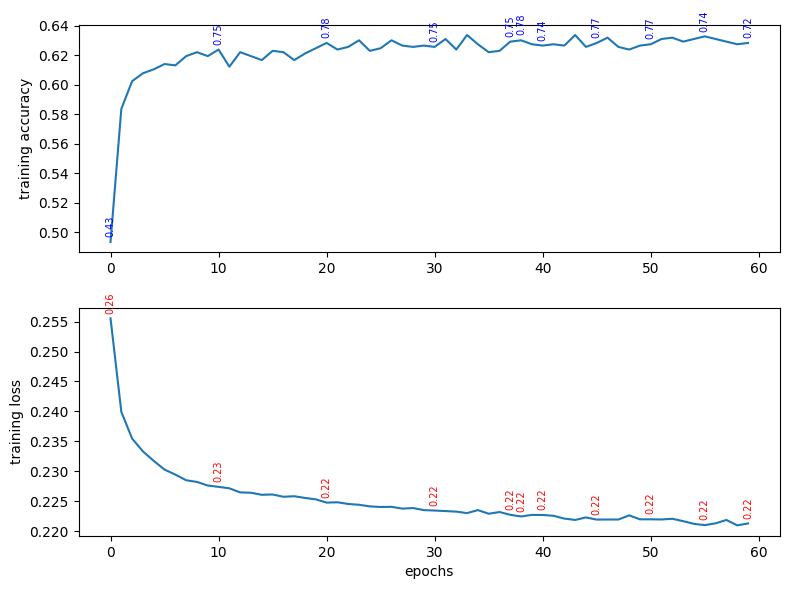

In [143]:
fig, (ax1, ax2) = plt.subplots (2, figsize=(8,6))

acc = model_training_history_6.history['accuracy']
loss = model_training_history_6.history['loss']

ax1.plot(acc)
ax2.plot(loss)

epochs_to_annotate = [0, 10, 20, 30,37, 38, 40,45, 50, 55,len(acc)-1]

for i in epochs_to_annotate:
    ax1.annotate(f'{recall[i]:.2f}', (i, acc[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='blue', rotation=90)
    ax2.annotate(f'{loss[i]:.2f}', (i, loss[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='red', rotation=90)

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')

plt.tight_layout()
plt.show()

- I notice using binary_crossentopy as a loss metric really increases the loss values. MeanSquared Error seems to perform better
- Improving the accuracy is the crux of the issue as the model only hits at peak at epoch 37 (0.76 accuracy and a loss vbalue of 0.22). 
    - this couyld be because tanh and relu were used or learning rate was introduced, or a batch-size

#### <span style = "color: #58c258ff;"> _Final Optimization_</span>

- increase the learning rate- we'd see if overfitting creeps in from the graph and at what epoch.
- Add another layer with tanh

In [ ]:
#Model Build
model_7 = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"), 
    layers.Dense(8, activation="relu"), #not sure which layer relu could have been but since tanh is zero-cenred and broader -1 and 1, its probably bteer to give the nmodel enough room with tanh and streamline with relu- closer to the output
    layers.Dense(1, activation="sigmoid")
])



#Model Compiling
from tensorflow.keras.optimizers import SGD
model_7.compile(
    optimizer=SGD(learning_rate=0.05),
    loss="MeanSquaredError",
    metrics=["accuracy"]
)


#Model Fitting
model_training_history_7 = model_7.fit(
    X_train,
    Y_train,
    epochs=60,
    batch_size=100
)



c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5585 - loss: 0.2424
Epoch 2/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5871 - loss: 0.2443
Epoch 3/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6139 - loss: 0.2407 
Epoch 4/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6050 - loss: 0.2413
Epoch 5/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6157 - loss: 0.2370 
Epoch 6/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6211 - loss: 0.2358 
Epoch 7/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6372 - loss: 0.2343
Epoch 8/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6229 - loss: 0.2344
Epoch 9/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6247 - loss: 0.2312 
Epoch 10/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6488 - loss: 0.2308 
Epoch 11/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6309 - loss: 0.2302 
Epoch 12/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 

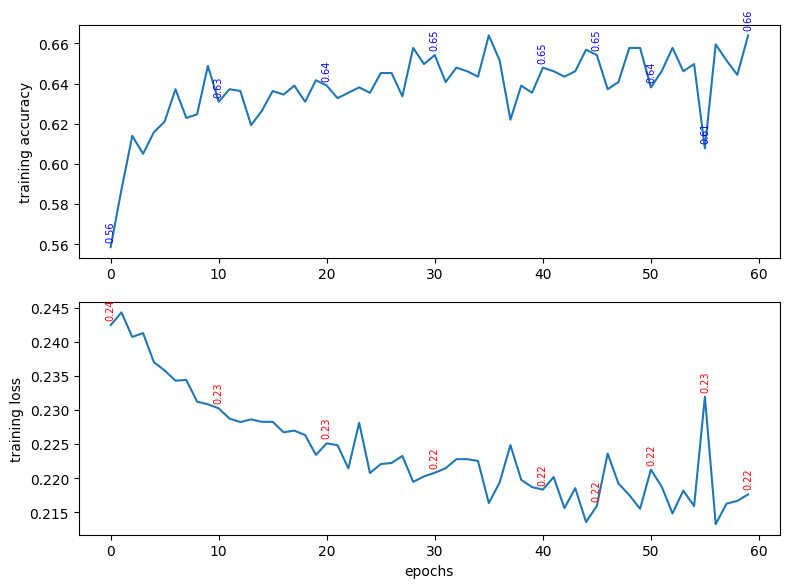

In [145]:
fig, (ax1, ax2) = plt.subplots (2, figsize=(8,6))

acc = model_training_history_7.history['accuracy']
loss = model_training_history_7.history['loss']

ax1.plot(acc)
ax2.plot(loss)

epochs_to_annotate = [0, 10, 20, 30,40,45, 50, 55,len(acc)-1]

for i in epochs_to_annotate:
    ax1.annotate(f'{acc[i]:.2f}', (i, acc[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='blue', rotation=90)
    ax2.annotate(f'{loss[i]:.2f}', (i, loss[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=7, color='red', rotation=90)

ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')

plt.tight_layout()
plt.show()

The accuracy is worse than earler- probably the new layer or the increase learning rate. In all, model 6 seems to perform the best at epoch 37. The model will be adjusted to epopch 37 to avoid overfitting on new data

In [146]:
#Model Build
model_6 = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="relu"), #not sure which layer relu could have been but since tanh is zero-cenred and broader -1 and 1, its probably bteer to give the nmodel enough room with tanh and streamline with relu- closer to the output
    layers.Dense(1, activation="sigmoid")
])



#Model Compiling
from tensorflow.keras.optimizers import SGD
model_6.compile(
    optimizer=SGD(learning_rate=0.01),
    loss="MeanSquaredError",
    metrics=["accuracy"]
)


#Model Fitting
model_training_history_6 = model_6.fit(
    X_train,
    Y_train,
    epochs=37,     #adjusted epoch as per the best fit from the graph
    batch_size=100
)



c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4745 - loss: 0.2741  
Epoch 2/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5308 - loss: 0.2516 
Epoch 3/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5621 - loss: 0.2426 
Epoch 4/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5979 - loss: 0.2380 
Epoch 5/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6202 - loss: 0.2355 
Epoch 6/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6148 - loss: 0.2342
Epoch 7/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6229 - loss: 0.2328  
Epoch 8/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6229 - loss: 0.2318
Epoch 9/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6148 - loss: 0.2310 
Epoch 10/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6211 - loss: 0.2304 
Epoch 11/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6202 - loss: 0.2300 
Epoch 12/37
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

## <span style="color: #36badbff;"> Hypertuning Notes/Ideas </span>

### <span style="color: #36badbff;"> _Examples of Hypertuning in Keras_</span>

Below are code examples for common hyperparameter tuning options in Keras neural networks. You can copy and adapt these to your own experiments.

**1. Change the optimizer**
```python
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
```

**2. Adjust the learning rate**
```python
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
```

**3. Add dropout layers to prevent overfitting**
```python
from tensorflow.keras.layers import Dropout
model = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(64, activation='relu'),
    Dropout(0.5),  # 50% dropout
    layers.Dense(32, activation='relu'),
    Dropout(0.3),  # 30% dropout
    layers.Dense(1, activation='sigmoid')
])
```

**4. Change batch size**
```python
model.fit(X_train, Y_train, epochs=50, batch_size=32)
model.fit(X_train, Y_train, epochs=50, batch_size=64)
```

**5. Add regularization (L1, L2) to Dense layers**
```python
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(1, activation='sigmoid')
])
```

**6. Vary the number of epochs**
```python
model.fit(X_train, Y_train, epochs=100)
model.fit(X_train, Y_train, epochs=20)
```

**7. Try different loss functions**
```python
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
```

**8. Add more hidden layers or change their sizes**
```python
model = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
```

**Tip:** Change one hyperparameter at a time and observe the effect on accuracy, loss, and other metrics.

---

### <span style="color: #36badbff;"> _Activation Functions for Hidden Layers: relu, tanh, and Others_</span>



**ReLU (Rectified Linear Unit):**
- Most common for hidden layers in modern neural networks.
- Formula: $f(x) = \max(0, x)$
- Pros: Fast, avoids vanishing gradients, works well for deep networks.
- Cons: Can cause "dead neurons" if weights become negative and never recover.
- Use for: Most deep learning tasks, especially with large datasets and deep architectures.

**tanh (Hyperbolic Tangent):**
- Formula: $f(x) = \tanh(x)$, outputs between -1 and 1.
- Pros: Zero-centered output, can help with convergence in some cases.
- Cons: Can still suffer from vanishing gradients in deep networks.
- Use for: When you want hidden layer outputs to be centered around zero, or for shallow networks.

**Other activations:**
- **Leaky ReLU:** Like relu, but allows a small negative slope for $x < 0$; helps prevent dead neurons.
- **ELU, SELU:** Variants for improved learning in some cases.
- **Softmax:** Used only for output layer in multi-class classification.
- **Sigmoid:** Used for output layer in binary classification.

**Input Layer:**
- The input layer itself does not use an activation function; it just passes the raw features to the first hidden layer.
- The first hidden layer is where you choose relu, tanh, etc.

**Summary Table:**
| Layer Type      | Common Activations | Purpose/Use Case                  |
|----------------|--------------------|-----------------------------------|
| Input          | None               | Passes raw features               |
| Hidden         | relu, tanh, leaky relu, elu | Feature extraction, learning complex patterns |
| Output (binary)| sigmoid            | Probability for binary class       |
| Output (multi) | softmax            | Probability for multi-class        |

**Tip:** Try relu first for hidden layers. If training is unstable or slow, try tanh or leaky relu.

---

---

### Task 2 - Evaluation Metrics

In this week's reading we looked at some evaluation metrics for classification tasks, including the confusion matrix. Sklearn has some functionality for `classification_report` and `confusion_matrix` which we can use.

```python
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
```

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

We can use `model.evaluate(test_x, test_y)` to run through our test set and provide some loss and accuracy metrics.

Additional, we can introduce `model.predict()` and provide input data to the model. This will run a forward pass on the data to obtain the network's estimate. This is called *inference*. Once we have all the predicted y values, we can run our own metric calculations.

In [147]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6771 - loss: 0.5783
0.5782816410064697 0.6770833134651184


In [148]:
test_loss_6, test_acc_6 = model_6.evaluate(X_test, Y_test)
print(test_loss_6, test_acc_6)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6604 - loss: 0.2276  
0.2276235669851303 0.6604166626930237


<span style = "color: #2cc7c7ff;">_The loss value is better than the original model_ </span>

In [149]:
y_pred = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [150]:
y_pred_6 = model_6.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Ground truth Y data, predicted Y data.
# We have to threshold our network ourselves currently due to the sigmoid output.
# We can interpret this output as a form of probability or confidence value. Closer to 1, the more probable.
# We will assume that >= 0.5 is a 1, and < 0.5 is a 0.

print(confusion_matrix(Y_test, np.round(y_pred) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(Y_test, np.round(y_pred) ).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

[[ 61 132]
 [ 23 264]]
TP: 264
FP: 132
TN: 61
FN: 23


In [ ]:


print(confusion_matrix(Y_test, np.round(y_pred_6) ))

# We can even assign variables to the output! adding .ravel() to the conf matrix.
tn, fp, fn, tp = confusion_matrix(Y_test, np.round(y_pred_6) ).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

We can also use the `ConfusionMatrixDisplay` utility of sklearn to visualise our matrix.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions

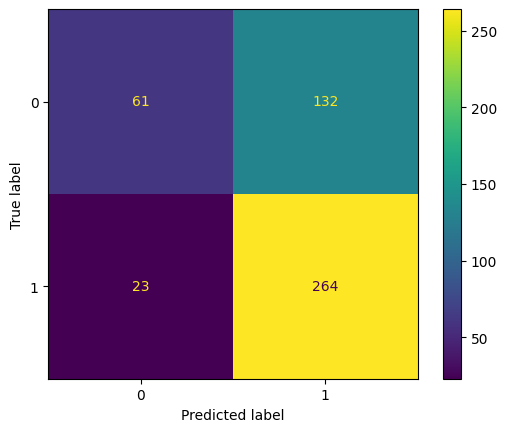

In [152]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(Y_test, np.round(y_pred))

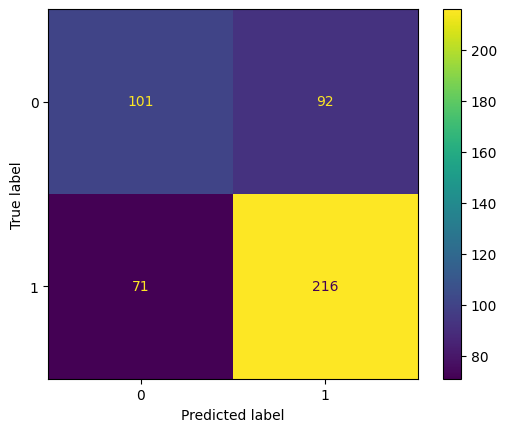

In [155]:
ConfusionMatrixDisplay.from_predictions(Y_test, np.round(y_pred_6))

<span style = "color: #2cc7c7ff;">_With this, we have less FP compared to the original model. Ultimately, this isnt bad , asa business the goal for a wine business may be to ensure its predictions of good wines are mostly alwayws true. It's better FN (stating a wine is bad when it's in fact true) than FP (Wrongly predicting bad wines to be good- this can bring bad reviews and lact of trust from customers). However, if the business was focused on suppliers- helping them evaluate the quality of their wine, the focus may be on F1 score 9as its important not to say a manufactures's wine is bad misleading them to further invest tons of cash in finetuining the taste when it was in fact good (FN); and misleading manufaturers' their wine is good- invariably assuring them to go into sales when in fact no one will like their wine (FP)._ </span>

#### Calculate
Calculate the Precision, Recall, and F1-Score from the TP/TN/FP/FN metrics above. **Remember**: This is for the test set only, we can call `.shape` on them to get the number of rows and features.

In [165]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

In [158]:
precision_score(Y_test, np.round(y_pred_6))

0.7012987012987013

In [159]:
precision_score(Y_test, np.round(y_pred))

0.6666666666666666

In [166]:
recall_score(Y_test, np.round(y_pred))

# Not far-fetched, the FN is 23, and FP 132

0.9198606271777003

In [167]:
recall_score(Y_test, np.round(y_pred_6))

#NOT SURPRISING- THE FN IS 71, and FP 92

0.7526132404181185

In [169]:
f1_score(Y_test, np.round(y_pred))

0.7730600292825769

In [168]:
f1_score(Y_test, np.round(y_pred_6))

0.7260504201680672

---

## Task 3 - Experimentation

Go back through the code in this activity and try the following experiments:
* Change the values for the number of hidden nodes in a single hidden layer
* Change the number of hidden layers
* Vary the number of neurons in both of these layers
* Modify the Epoch numbers and observe the loss graphs.

Your goal is to see the impact that these changes have on the overall accuracy, confusion matrix, precision/recall/f-1 scores. Be sure not to change too many all at once, otherwise you won't know what caused the change.

#### <span style = "color: #58c258ff;"> _All Done_</span>


In [171]:
#I used AI here to undertsnad the coee blocm if i wanted to validate and adjust my Recall score.

  # 1. SPLIT YOUR DATA FIRST
X_temp, X_test, Y_temp, Y_test = train_test_split(arr_train_x, arr_train_y, test_size=0.2, random_state=2)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=2)

# 2. BUILD AND COMPILE MODEL
model_8 = keras.Sequential([
    layers.InputLayer(input_shape=(11,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_8.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

# 3. TRAIN WITH VALIDATION SET
history = model_8.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val), # <-- Validation data provided here
    epochs=50
)

# 4. FIND BEST THRESHOLD FOR RECALL ON VALIDATION SET
y_val_probs = model_8.predict(X_val)
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
for thresh in thresholds:
    y_val_preds = (y_val_probs > thresh).astype("int32")
    rec = recall_score(Y_val, y_val_preds)
    print(f"Threshold: {thresh:.2f} -> Recall: {rec:.4f}")

# 5. EVALUATE ON TEST SET WITH CHOSEN THRESHOLD
chosen_threshold = 0.3 # You choose this based on step 4
y_test_preds = (model_8.predict(X_test) > chosen_threshold).astype("int32")
final_recall = recall_score(Y_test, y_test_preds)
print(f"\nFinal Model Recall on Unseen Test Data: {final_recall:.4f}")

c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5543 - loss: 2.1211 - val_accuracy: 0.5703 - val_loss: 0.8775
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5914 - loss: 0.7501 - val_accuracy: 0.5938 - val_loss: 0.6828
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6012 - loss: 0.7232 - val_accuracy: 0.6016 - val_loss: 0.6598
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5767 - loss: 0.6887 - val_accuracy: 0.6055 - val_loss: 0.6607
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6080 - loss: 0.6673 - val_accuracy: 0.6016 - val_loss: 0.6791
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5914 - loss: 0.6653 - val_accuracy: 0.6523 - val_loss: 0.6561
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6129 - loss: 0.6502 - val_accuracy: 0.5820 - val_loss: 0.6609
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6197 - loss: 0.6438 - val_accuracy: 0.6602 - val_los